In [133]:
%pylab inline
rcParams.update({'figure.figsize': (10, 8)})
rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


In [134]:
fs = 100 # Hz
y = loadtxt('FFT_Example_data_with_window.txt')
t = linspace(0,len(y)/fs,len(y))

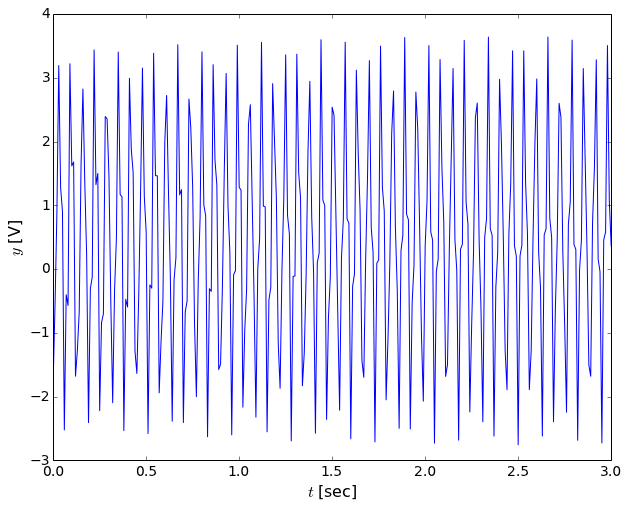

In [135]:
plot(t,y)
xlabel('$t$ [sec]',fontsize=16)
ylabel('$y$ [V]',fontsize=16)

In [136]:
# subtract the DC:
yf = y - mean(y)

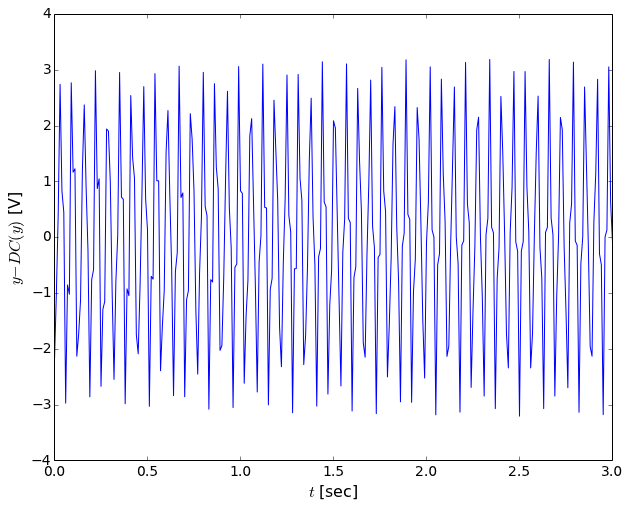

In [137]:
plot(t,yf)
xlabel('$t$ [sec]',fontsize=16)
ylabel('$y - DC(y) $ [V]',fontsize=16)

In [138]:
def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    Following: http://goo.gl/wRoUn
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(np.int(n/2))] # one side frequency range
    Y = 2*fft.fft(y)/n # fft computing and normalization
    Y = Y[range(np.int(n/2))]
    return frq, Y

def plotSignal(t,y,frq,Y):
    """ plots the time signal Y(t) and the 
    frequency spectrum Y(fs)
    Inputs:
        t - time 
        y - signal
    Outputs:
        t - time signal, [sec]
        Y - values, [Volt]
    Usage:
        plotSignal(t,y,fs)
    """

    # Plot
    figure()
    subplot(2,1,1)
    plot(t,y,'b-')
    xlabel('$t$ [s]',fontsize=16)
    ylabel('$Y$ [V]',fontsize=16)
    # axes().set_aspect(0.2)
    # title('sampled signal')
    subplot(2,1,2)
    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('$f$ (Hz)',fontsize=16)
    ylabel('$|Y(f)|$',fontsize=16)

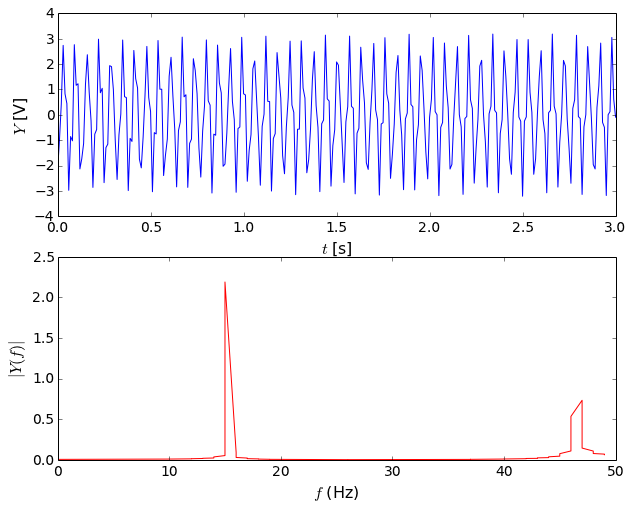

In [139]:
frq,Y = spectrum(yf,fs) 
plotSignal(t,yf,frq,Y)